In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import re
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("D:/PYTHON\ML/project with report/Using_ML_HousePrice/housePrice.csv")

In [3]:
df.shape

(3479, 8)

#here there are 3479 no of rows and 8 columns

In [4]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


#There is some information about each house
#Area in square meters
#Number of bedrooms
#Has Parking or not
#Has elevator or not
#Has warehouse or not
#The region where the house is placed
#Price in Toman and USD 

In [5]:
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Room,3479.0,2.079908e+00,7.582753e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
Price,3479.0,5.359023e+09,8.099935e+09,3600000.0,1.418250e+09,2.900000e+09,6.000000e+09,9.240000e+10
Price(USD),3479.0,1.786341e+05,2.699978e+05,120.0,4.727500e+04,9.666667e+04,2.000000e+05,3.080000e+06


In [7]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [8]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [11]:
df['Room'].unique()

array([1, 2, 3, 0, 4, 5], dtype=int64)

In [12]:
# now convert  bollen feature into numeric values 1,0 
df[['Parking','Warehouse','Elevator']] = df[['Parking','Warehouse','Elevator']].astype(int)
df.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [13]:
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00


<AxesSubplot:title={'center':'Room v/s Price(USD)'}, xlabel='Room', ylabel='Price(USD)'>

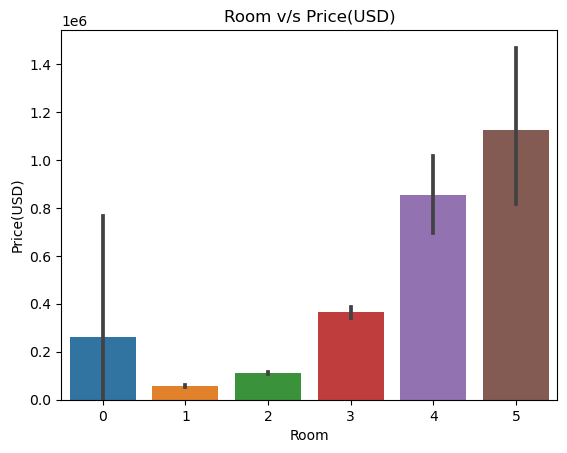

In [14]:
plt.title('Room v/s Price(USD)')

sns.barplot(x="Room", y="Price(USD)", data=df)

<AxesSubplot:title={'center':'Elevator v/s Price(USD)'}, xlabel='Elevator', ylabel='Price(USD)'>

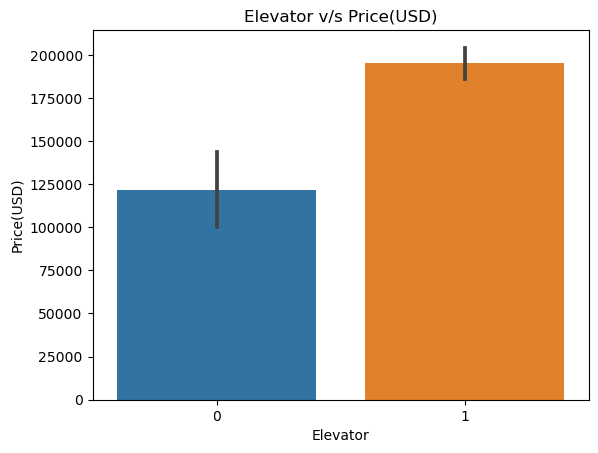

In [15]:
plt.title('Elevator v/s Price(USD)')

sns.barplot(x="Elevator", y="Price(USD)", data=df)

<AxesSubplot:title={'center':'Warehouse v/s Price(USD)'}, xlabel='Warehouse', ylabel='Price(USD)'>

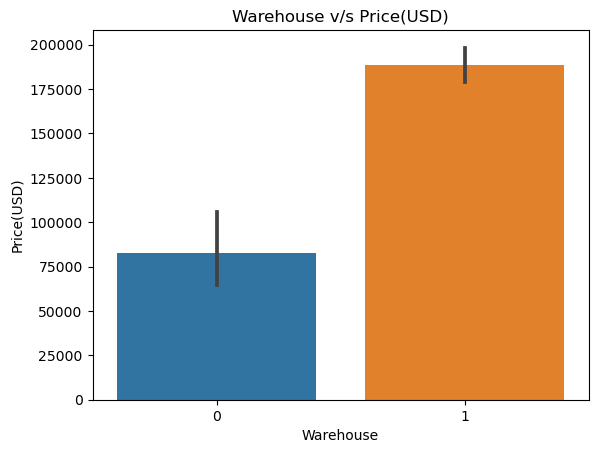

In [16]:
plt.title('Warehouse v/s Price(USD)')

sns.barplot(x="Warehouse", y="Price(USD)", data=df)

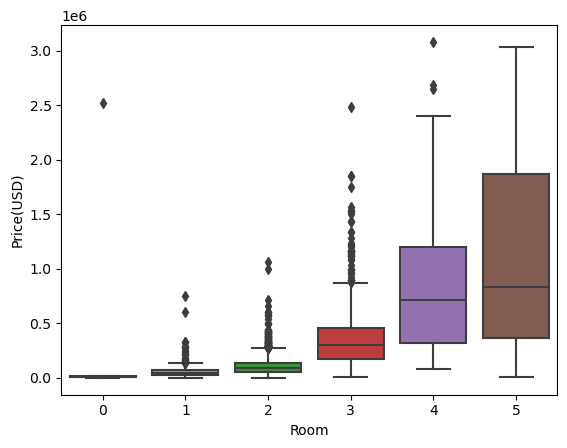

In [17]:
ax = sns.boxplot(x="Room", y="Price(USD)", data=df)

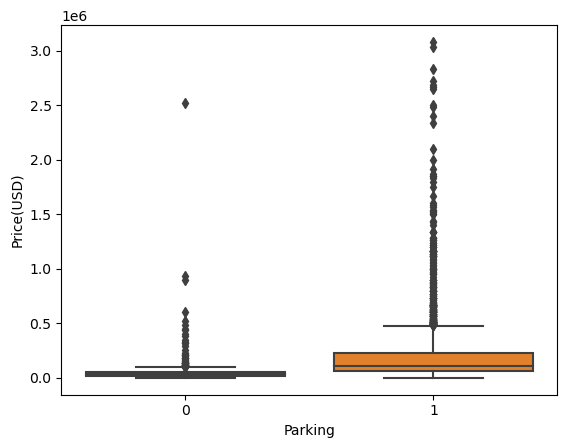

In [18]:
ax = sns.boxplot(x="Parking", y="Price(USD)", data=df)


<AxesSubplot:xlabel='Room', ylabel='Price'>

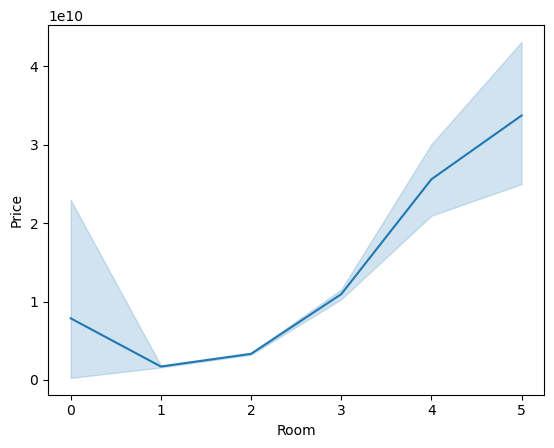

In [19]:
sns.lineplot(data = df, x = 'Room', y ='Price' )


<AxesSubplot:>

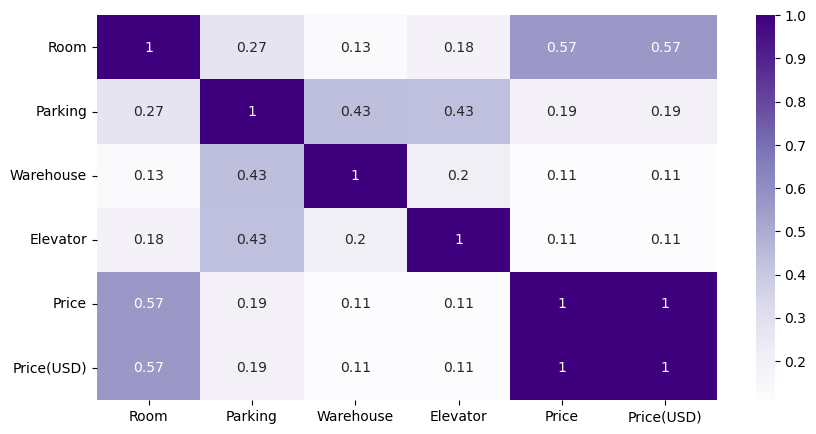

In [20]:
correlation=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot = True, cmap = 'Purples')

In [21]:
# now lets drop column "Address" and price  because it will not contribut while building a model
df.drop(['Address',"Price"], axis=1, inplace=True)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
0,63,1,1,1,1,61666.67
1,60,1,1,1,1,61666.67
2,79,2,1,1,1,18333.33
3,95,2,1,1,1,30083.33
4,123,2,1,1,1,233333.33


In [22]:
df['Price(USD)'] = df['Price(USD)'].astype(int)
df.info('Price(USD)')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Area        3456 non-null   object
 1   Room        3456 non-null   int64 
 2   Parking     3456 non-null   int32 
 3   Warehouse   3456 non-null   int32 
 4   Elevator    3456 non-null   int32 
 5   Price(USD)  3456 non-null   int32 
dtypes: int32(4), int64(1), object(1)
memory usage: 264.0+ KB


In [23]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

in below import multiple scikit_learn library.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Linear Regression :

In [25]:
# Create a linear regression model
lr = LinearRegression()

In [26]:
X=df.drop("Price(USD)", axis=1,)
y=df['Price(USD)']

#Train the model on the dataset

In [27]:
lr.fit(X, y)

LinearRegression()

In [28]:
 x_train, x_test,y_train,y_test=train_test_split(X,y ,test_size=0.2, random_state=8)

 Evaluate the model

In [29]:
y_pred = lr.predict(x_test)

 in the below cell we compute the evaluation metrics.

In [30]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_squared = lr.score(x_test, y_pred)

Below cell print the evaluation metrics

In [31]:
print('Mean Squared Error: ',lr_mse)
print('root Mean Squared Error: ',lr_rmse)
print('root mean squred error: ', lr_squared)

Mean Squared Error:  27658121568.421448
root Mean Squared Error:  166307.31062831078
root mean squred error:  1.0


RMSE indicates better performance on the linear regression model.

# Random forest Regression :

Fit the model for Random Forest Regression.

In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

in the below we predict the target variable for the test set.

In [33]:
y_pred = model.predict(x_test)

 in the below cell we compute the evaluation metrics.

In [34]:

rfr_mse = mean_squared_error(y_test, y_pred)
rfr_rmse = np.sqrt(rfr_mse)
rfr_mae = mean_absolute_error(y_test, y_pred)
rfr_r2 = r2_score(y_test, y_pred)

Below cell print the evaluation metrics.

In [35]:
print('Mean Squared Error: ', rfr_mse)
print('Root Mean Squared Error: ', rfr_rmse)
print('Mean Absolute Error: ', rfr_mae)
print('R2 Score: ', rfr_r2)

Mean Squared Error:  13624958328.467304
Root Mean Squared Error:  116725.99679791689
Mean Absolute Error:  66300.97571233594
R2 Score:  0.6461944486196864


# SVR(support vector machine regression :

fit the model for svr

In [36]:
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model.fit(X, y)

SVR(C=100, gamma=0.1)

In [37]:
y_pred = model.predict(x_test)

Mean Squared Error (MSE): This is the average of the squared differences between the predicted and actual values. A lower MSE indicates better performance.

 in the below cell we compute the evaluation metrics.

In [38]:
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

Below cell print the evaluation metrics.

In [39]:
print('Mean Squared Error: ', svr_mse)
print('Root Mean Squared Error: ', svr_rmse)
print('Mean Absolute Error: ', svr_mae)
print('R2 Score: ', svr_r2)

Mean Squared Error:  40756685066.4255
Root Mean Squared Error:  201882.84985710276
Mean Absolute Error:  104622.57934121475
R2 Score:  -0.05834756222572546


In this example, we first load a dataset with multiple input variables and a continuous target variable. We then split the data into training and testing sets, and fit an SVR model to the training data using the radial basis function kernel.

We use the model to predict the target variable for the test set, and compute the evaluation metrics. Finally, we print the values of the evaluation metrics.

Mean Squared Error (MSE): This is the average of the squared differences between the predicted and actual values. A lower MSE indicates better performance.

Root Mean Squared Error (RMSE): This is the square root of the MSE. It gives an idea of how much the predictions deviate from the actual values, in the same units as the target variable. Like MSE, a lower RMSE indicates better performance.

Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted and actual values. It is less sensitive to outliers than MSE or RMSE. A lower MAE indicates better performance.

R-squared (R2): This measures the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating better performance.

# knn Regression :

below knn model fit

In [40]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsRegressor()

Predict the target variable for the test set

In [41]:
y_pred = model.predict(x_test)

 in the below cell we compute the evaluation metrics.

In [42]:
knnr_mse = mean_squared_error(y_test, y_pred)
knnr_rmse = np.sqrt(knnr_mse)
knnr_mae = mean_absolute_error(y_test, y_pred)
knnr_r2 = r2_score(y_test, y_pred)

Below cell print the evaluation metrics

In [43]:
print('Mean Squared Error: ', knnr_mse)
print('Root Mean Squared Error: ', knnr_rmse)
print('Mean Absolute Error: ', knnr_mae)
print('R2 Score: ', knnr_r2)

Mean Squared Error:  17434634973.220055
Root Mean Squared Error:  132040.27784437616
Mean Absolute Error:  70925.66329479769
R2 Score:  0.5472668252550521


below create dataframe for all models that we applied with RMSE (Root Mean Squared Error).

In [44]:
m_score = pd.DataFrame({'RMSE': [lr_rmse,svr_rmse, knnr_rmse, rfr_rmse]},
                     index = ['LinearRegression','RandomForestRegression','SVR', 'KNeighborsRegression']) 

In [45]:
m_score

,RMSE
LinearRegression,166307.310628
RandomForestRegression,201882.849857
SVR,132040.277844
KNeighborsRegression,116725.996798


END